In [6]:
import numpy as np
import matplotlib.pyplot as plt

from TidalPy.utilities.spherical_helper.volume import calculate_voxel_volumes, calculate_voxel_volumes_npy

In [16]:
planet_radius = 6300.0e3
def array_builder(N, R=planet_radius):
    """ Helper function to quickly build radius and degree arrays """
    radius_array = np.linspace(0., R, N)
    longitude_array_deg = np.linspace(0., 360., N)
    colatitude_array_deg = np.linspace(0., 180., N)
    longitude_array = np.radians(longitude_array_deg)
    colatitude_array = np.radians(colatitude_array_deg)

    return radius_array, longitude_array, colatitude_array

In [8]:
# Compare times between numpy and numba versions
radius, long, colat = array_builder(50)

print('Numpy')
%timeit calculate_voxel_volumes_npy(radius, long, colat)

print('Numba')
%timeit calculate_voxel_volumes(radius, long, colat)

Numpy
547 µs ± 63.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Numba
350 µs ± 10.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


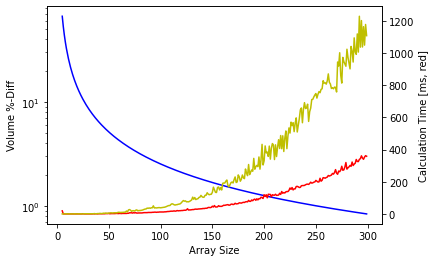

In [18]:
from time import time
# Show how voxel volumes compare to real volume over N
n_array = np.arange(start=5, stop=300, step=1)

time_taken_numba = list()
time_taken_numpy = list()
voxel_result = list()

for n in n_array:
    radius, longitude, colatitude = array_builder(n)
    t0 = time()
    voxel_volume = calculate_voxel_volumes(radius, longitude, colatitude)
    tf = time() - t0
    time_taken_numba.append(tf)
    voxel_result.append(np.sum(voxel_volume))

    t0 = time()
    _ = calculate_voxel_volumes_npy(radius, longitude, colatitude)
    tf = time() - t0
    time_taken_numpy.append(tf)

time_taken_numpy = np.asarray(time_taken_numpy)
time_taken_numba = np.asarray(time_taken_numba)
voxel_result = np.asarray(voxel_result)

real_volume = (4. / 3.) * np.pi * planet_radius**3
percent_diff = np.abs(real_volume - voxel_result) / real_volume

fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(n_array, percent_diff * 100, 'b-')
ax.set(xlabel='Array Size', ylabel='Volume %-Diff', yscale='log')
ax2.plot(n_array, time_taken_numba * 1000, 'r-')
ax2.plot(n_array, time_taken_numpy * 1000, 'y-')
ax2.set(ylabel='Calculation Time [ms, red]')

plt.show()
